## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import datetime

## Reading global data 

In [2]:
confirmed_df = pd.read_csv('../Documents/covid19-visualization datasets/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('../Documents/covid19-visualization datasets/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('../Documents/covid19-visualization datasets/time_series_covid19_recovered_global.csv')

## Exploratory data analysis

In [3]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = deaths_df[deaths_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)


print("No.of Confirmed Cases", world_confirmed)
print("No. of Recovered Cases",world_recovered)
print("No. of Deaths",world_deaths)
print("No. of Active Cases",world_active)


No.of Confirmed Cases 4/14/21    138259810
dtype: int64
No. of Recovered Cases 4/14/21    78739488
dtype: int64
No. of Deaths 4/14/21    2972617
dtype: int64
No. of Active Cases 4/14/21    62492939
dtype: int64


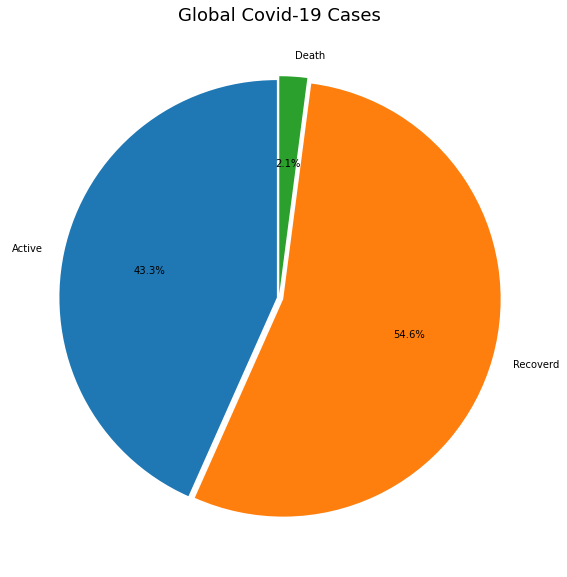

In [4]:
plt.figure(figsize= (10,10))
y = np.array([62492939, 78739488, 2972617])
mylabels = ["Active", "Recoverd", "Death"]
myexplode = [0.01, 0.02, 0.02]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', startangle = 90, explode = myexplode)
plt.title("Global Covid-19 Cases", fontsize=18)
plt.show() 

#### Till 14th April 2021, There were total 138259810 confirmed cases, 78739488 recovered cases, 2972617 Deaths,and 62492939 Active Cases.

# Scenario of Bangladesh

In [5]:
# Bangladesh All data from 02-03-2020 to 23-04-2021
data_bd = pd.read_csv('../Documents/covid19-visualization datasets/BangladeshCovid.csv')
data_bd.head(8)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Bangladesh,NaN,NaN,NaN,NaN,0,0,0,0,0,0,2020-03-02 00:00:00+00:00
1,Bangladesh,NaN,NaN,NaN,NaN,0,0,0,0,0,0,2020-03-03 00:00:00+00:00
2,Bangladesh,NaN,NaN,NaN,NaN,0,0,0,0,0,0,2020-03-04 00:00:00+00:00
3,Bangladesh,NaN,NaN,NaN,NaN,0,0,0,0,0,0,2020-03-05 00:00:00+00:00
4,Bangladesh,NaN,NaN,NaN,NaN,0,0,0,0,0,0,2020-03-06 00:00:00+00:00
5,Bangladesh,NaN,NaN,NaN,NaN,0,0,0,0,0,0,2020-03-07 00:00:00+00:00
6,Bangladesh,NaN,NaN,NaN,NaN,0,0,3,0,0,3,2020-03-08 00:00:00+00:00
7,Bangladesh,NaN,NaN,NaN,NaN,0,0,3,0,0,3,2020-03-09 00:00:00+00:00


In [6]:
data_bd.tail(8)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
410,Bangladesh,NaN,NaN,NaN,NaN,0,0,711779,10182,602908,98689,2021-04-16 00:00:00+00:00
411,Bangladesh,NaN,NaN,NaN,NaN,0,0,715252,10283,608815,96154,2021-04-17 00:00:00+00:00
412,Bangladesh,NaN,NaN,NaN,NaN,0,0,718950,10385,614936,93629,2021-04-18 00:00:00+00:00
413,Bangladesh,NaN,NaN,NaN,NaN,0,0,723221,10497,621300,91424,2021-04-19 00:00:00+00:00
414,Bangladesh,NaN,NaN,NaN,NaN,0,0,727780,10588,628111,89081,2021-04-20 00:00:00+00:00
415,Bangladesh,NaN,NaN,NaN,NaN,0,0,732060,10683,635183,86194,2021-04-21 00:00:00+00:00
416,Bangladesh,NaN,NaN,NaN,NaN,0,0,736074,10781,642449,82844,2021-04-22 00:00:00+00:00
417,Bangladesh,NaN,NaN,NaN,NaN,0,0,739703,10869,647674,81160,2021-04-23 00:00:00+00:00


In [7]:
data_bd['CountryCode'].fillna(0)
data_bd['Province'].fillna(0)
data_bd['City'].fillna(0)
data_bd['CityCode'].fillna(0)
confirmed_cases = data_bd.drop(columns=['Country', 'CountryCode','Province','City','CityCode','Lat', 'Lon', 'Deaths', 'Recovered', 'Active'])
confirmed_cases.head(8)

,Confirmed,Date
0,0,2020-03-02 00:00:00+00:00
1,0,2020-03-03 00:00:00+00:00
2,0,2020-03-04 00:00:00+00:00
3,0,2020-03-05 00:00:00+00:00
4,0,2020-03-06 00:00:00+00:00
5,0,2020-03-07 00:00:00+00:00
6,3,2020-03-08 00:00:00+00:00
7,3,2020-03-09 00:00:00+00:00


In [8]:
cases = data_bd.drop(columns=['Country', 'CountryCode','Province','City','CityCode','Lat', 'Lon'])
cases.tail()

,Confirmed,Deaths,Recovered,Active,Date
413,723221,10497,621300,91424,2021-04-19 00:00:00+00:00
414,727780,10588,628111,89081,2021-04-20 00:00:00+00:00
415,732060,10683,635183,86194,2021-04-21 00:00:00+00:00
416,736074,10781,642449,82844,2021-04-22 00:00:00+00:00
417,739703,10869,647674,81160,2021-04-23 00:00:00+00:00


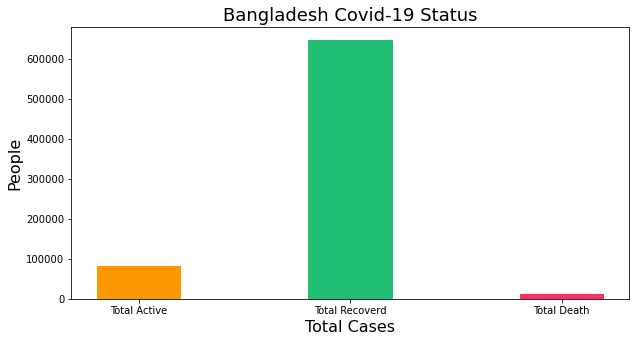

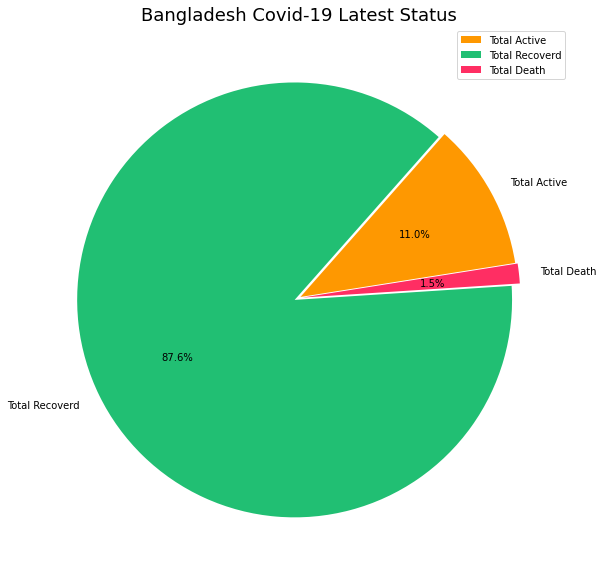

In [9]:
total_active = 81160
total_cure = 647674
total_death = 10869

# color palatte
color =['#fe9801', '#21bf73', '#ff2e63']

# creating the data
data = {'Total Active':total_active, 'Total Recoverd':total_cure, 'Total Death':total_death}
x = list(data.keys())
y = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color = color,
        width = 0.4)
 
plt.xlabel("Total Cases", fontsize=16)
plt.ylabel("People", fontsize=16)
plt.title("Bangladesh Covid-19 Status", fontsize=18)
plt.show()

plt.figure(figsize= (10,10))
y = np.array([81160, 647674, 10869])
mylabels = ["Total Active", "Total Recoverd", "Total Death"]
myexplode = [0.01, 0.02, 0.02]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', startangle = 9, explode = myexplode, colors=color)
plt.title("Bangladesh Covid-19 Latest Status", fontsize=18)
plt.legend()
plt.show() 


## Lockdown Analysis in Bangladesh

In [10]:
# Dividing data into 4 phases
tc_phase0 = data_bd[(cases['Date']>'2020-03-01') & (data_bd['Date']<'2020-03-25')].reset_index(drop=True) # considering pre lockdown period
tc_phase1 = data_bd[(cases['Date']>='2020-03-25') & (data_bd['Date']<='2020-04-14')].reset_index(drop=True) # Lockdown 1.0
tc_phase2 = data_bd[(cases['Date']>='2020-04-15') & (data_bd['Date']<='2020-05-03')].reset_index(drop=True) # Lockdown 2.0
tc_phase3 = data_bd[(cases['Date']>='2020-05-03') & (data_bd['Date']<'2020-05-17')].reset_index(drop=True) # Lockdown 3.0cases
tc_cases0 = cases[(cases['Date']>'2020-03-01') & (data_bd['Date']<'2020-03-25')].reset_index(drop=True) # considering pre lockdown period
tc_cases1 = cases[(cases['Date']>='2020-03-25') & (data_bd['Date']<='2020-04-14')].reset_index(drop=True) # Lockdown 1.0
tc_cases2 = cases[(cases['Date']>='2020-04-15') & (data_bd['Date']<='2020-05-03')].reset_index(drop=True) # Lockdown 2.0
tc_cases3 = cases[(cases['Date']>='2020-05-03') & (data_bd['Date']<'2020-05-17')].reset_index(drop=True) # Lockdown 3.0

tc_test1 = data_bd[(data_bd['Date']>='2020-03-25') & (data_bd['Date']<='2020-04-14')].reset_index(drop=True) # Lockdown 1.0
tc_test2 = data_bd[(data_bd['Date']>='2020-04-15') & (data_bd['Date']<='2020-05-03')].reset_index(drop=True) # Lockdown 2.0
tc_test3 = data_bd[(data_bd['Date']>='2020-05-03') & (data_bd['Date']<'2020-05-17')].reset_index(drop=True) # Lockdown 3.0

In [11]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [12]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [13]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

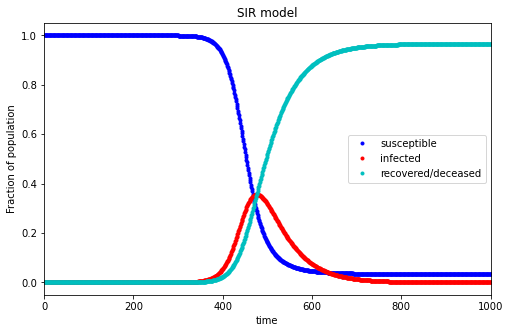

In [14]:
# Parameters of the model
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

### Analysing Data Before Lockdown Phase 0 ( 1 March 2020 - 25 March 2020) 

In [15]:
# stacked bar chart

# subset columns
temp = tc_cases0[['Date', 'Active', 'Deaths', 'Recovered']]

# rename columns
temp.columns = ['Date', 'Active', 'Deaths', 'Cured']

# melt data
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

# plot
fig_2 = px.bar(temp, x="Date", y="Count", color='Case', height=400, 
               title='Cases over time')
fig_2.show()

In [16]:
ss = []
for i in tc_phase0.index:
    if(i!= min(tc_phase0.index)):
        lm = tc_phase0.loc[i]['Confirmed']/tc_phase0.loc[i-1]['Confirmed']
    else:
        lm = np.NaN
    ss.append(lm)
        
tc_phase0['Growth_Rate'] = ss


ss1 = []
for i in tc_phase1.index:
    if(i!= min(tc_phase1.index)):
        lm1 = tc_phase1.loc[i]['Confirmed']/tc_phase1.loc[i-1]['Confirmed']
    else:
        lm1 = np.NaN
    ss1.append(lm1)
        
tc_phase1['Growth_Rate'] = ss1

ss2 = []
for i in tc_phase2.index:
    if(i!= min(tc_phase2.index)):
        lm2 = tc_phase2.loc[i]['Confirmed']/tc_phase2.loc[i-1]['Confirmed']
    else:
        lm2 = np.NaN
    ss2.append(lm2)
        
tc_phase2['Growth_Rate'] = ss2

ss3 = []
for i in tc_phase3.index:
    if(i!= min(tc_phase3.index)):
        lm3 = tc_phase3.loc[i]['Confirmed']/tc_phase3.loc[i-1]['Confirmed']
    else:
        lm3 = np.NaN
    ss3.append(lm3)
        
tc_phase3['Growth_Rate'] = ss3

In [17]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=tc_phase0['Date'], y=tc_phase0['Growth_Rate'], name='Growth Factor', \
                         marker=dict(color='#008040')))
fig1.layout.update(title_text='COVID-19 Growth Factor in Bangladesh w.r.t. Time',xaxis_showgrid=False, yaxis_showgrid=True, width=700, yaxis_title='Growth Factor',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
#print("Mean Growth Rate",tc_phase0['Growth_Rate'].mean())
fig1.layout.plot_bgcolor = '#314970'
fig1.layout.paper_bgcolor = '#314970'
fig1.show()

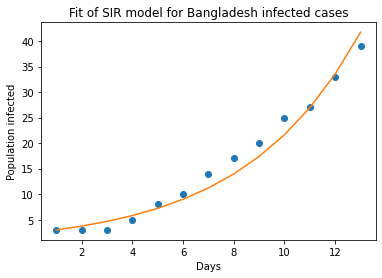

Optimal parameters: beta = 36.454255382906716  and gamma =  36.23445598016626


In [18]:
from scipy import integrate, optimize
population = float(163000000)
country_df = pd.DataFrame()
country_df['Confirmed'] = tc_phase0['Confirmed'].fillna(0)
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df['Confirmed']]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = tc_phase0['Recovered'].max()+tc_phase0['Deaths'].max()

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Bangladesh infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [19]:
temp = tc_phase0.copy()
temp['Mortality Rate'] = temp['Deaths']/temp['Confirmed']*100
print("Mean Mortaility Rate",temp['Deaths'].mean())
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality Rate'],mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Trend of Mortality Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

Mean Mortaility Rate 0.6086956521739131


In [20]:
temp = tc_phase0.copy()
temp['Recovery Rate'] = temp['Recovered']/temp['Confirmed']*100
print("Mean Recovery Rate",temp['Recovered'].mean())
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery Rate'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Trend of Recovery Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

Mean Recovery Rate 1.2173913043478262


### Observation Before Lockdown in Bangladesh

There were over 40 cases when the lockdown was implemented on 25th March.

The mean growth rate is 1.682900953337017.

Optimal parameters: beta = 3.924558628465904  and gamma =  3.705131772637688
from SIR model

Mean Mortaility Rate 0.6086956521739131.

Mean Recovery Rate 1.2173913043478262.

### Analysis of Lockdown 1.0 (25 March 2020 - 14 April 2020)

In [21]:
# stacked bar chart

# subset columns
temp = tc_cases1[['Date', 'Active', 'Deaths', 'Recovered']]

# rename columns
temp.columns = ['Date', 'Active', 'Deaths', 'Cured']

# melt data
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

# plot
fig_3 = px.bar(temp, x="Date", y="Count", color='Case', height=540, 
               title='Cases over time')
fig_3.show()

In [22]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=tc_phase1['Date'], y=tc_phase1['Growth_Rate'], name='Growth Factor', \
                         marker=dict(color='#008040')))
fig2.layout.update(title_text='COVID-19 Growth Factor in Bangladesh w.r.t. Time',xaxis_showgrid=False, yaxis_showgrid=True, width=700, yaxis_title='Growth Factor',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig2.layout.plot_bgcolor = '#4d3900'
fig2.layout.paper_bgcolor = '#4d3900'
fig2.show()
print("Mean Growth Rate",tc_phase1['Growth_Rate'].mean())

Mean Growth Rate 1.1814622490469913


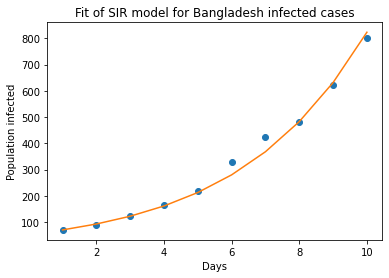

Optimal parameters: beta = 30.40578343819506  and gamma =  30.126995323098026


In [23]:
population = float(163000000)
country_df1 = pd.DataFrame()
country_df1['Confirmed'] = tc_phase1['Confirmed'].fillna(0)
country_df1 = country_df1[10:]
country_df1['day_count'] = list(range(1,len(country_df1)+1))

ydata = [i for i in country_df1['Confirmed']]
xdata = country_df1.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = rec0 = tc_phase1['Recovered'].max()+tc_phase1['Deaths'].max()

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]


popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Bangladesh infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tc_test1['Date'], y=tc_test1['Confirmed'],
                    mode='lines+markers',marker_color='blue'))
fig.update_layout(title_text = 'Rate of Testing')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [25]:
total_tested = tc_test1['Confirmed'].max()
total_positive = tc_test1['Active'].max()
#total_tested = tc_test3['total_tested'].max()
#total_positive = tc_test3['positive'].max()
positivecase_ratio = total_positive * 100 / total_tested
pcr = float("{:.2f}".format(positivecase_ratio))
test_million = np.round(1000000*tc_test1['Confirmed'].max()/163000000,2)
print('Total Number of people tested :', total_tested)
print('Total Number of positive cases :',total_positive)
print('Test Conducted per Million People :',test_million)
print('Positive case per Tests [%]:',pcr)
#Overall 
fig = go.Figure(data=[go.Pie(labels=['Total Samples Tested','Positive Cases from tested samples'],
                            values= [total_tested,total_positive],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='COVID19 Test Results from ICDR in Bangladesh',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

Total Number of people tested : 803
Total Number of positive cases : 722
Test Conducted per Million People : 4.93
Positive case per Tests [%]: 89.91


In [26]:
temp = tc_phase1.copy()
temp['Mortality Rate'] = temp['Deaths']/temp['Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality Rate'],mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Trend of Mortality Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()
print("Mean Mortality Rate",temp['Mortality Rate'].mean())

Mean Mortality Rate 9.367158833737772


In [27]:
temp = tc_phase1.copy()
temp['Recovery Rate'] = temp['Recovered']/temp['Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery Rate'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Trend of Recovery Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()
print("Mean Recovery Rate",temp['Recovery Rate'].mean())

Mean Recovery Rate 26.44655308973296


### Observation Lockdown 1
There were over 1k+ on 14th April out which 46 have recoverd and 42 were deaths.

Mean Growth Rate 1.174770643366856

Optimal parameters: beta = 30.40578343819506  and gamma =  30.126995323098026 using SIR Model

Total 1k+ testing was done till 14th April.

Total Number of people tested : 803

Total Number of positive cases : 722

Test Conducted per Million People : 4.93

Positive case per Tests [%]: 89.91

Mean Mortality Rate[%] 9.367158833737772

Mean Recovery Rate[%] 26.44655308973296

##  Analysis of Lockdown 2 ( 15 April 2020 - 03 May 2020)

In [28]:
# stacked bar chart

# subset columns
temp = tc_cases2[['Date', 'Active', 'Deaths', 'Recovered']]

# rename columns
temp.columns = ['Date', 'Active', 'Deaths', 'Cured']

# melt data
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

# plot
fig_4 = px.bar(temp, x="Date", y="Count", color='Case', height=540, 
               title='Cases over time')
fig_4.show()

In [29]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=tc_phase2['Date'], y=tc_phase2['Growth_Rate'], name='Growth Factor', \
                         marker=dict(color='#008040')))
fig3.layout.update(title_text='COVID-19 Growth Factor in Bangladesh w.r.t. Time',xaxis_showgrid=False, yaxis_showgrid=True, width=700, yaxis_title='Growth Factor',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig3.layout.plot_bgcolor = '#4d3900'
fig3.layout.paper_bgcolor = '#4d3900'
fig3.show()
print("Mean Growth Rate",tc_phase2['Growth_Rate'].mean())

Mean Growth Rate 1.123837193227214


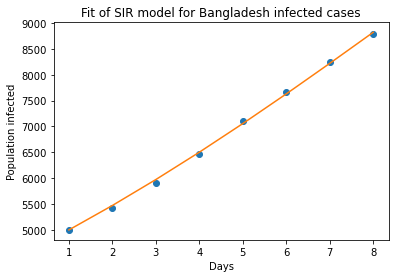

Optimal parameters: beta = -8.888870008813004  and gamma =  -8.980248618699164


In [30]:
country_df2 = pd.DataFrame()
country_df2['Confirmed'] = tc_phase2['Confirmed'].fillna(0)
country_df2 = country_df2[10:]
country_df2['day_count'] = list(range(1,len(country_df2)+1))

ydata = [i for i in country_df2['Confirmed']]
xdata = country_df2.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = rec0 = tc_phase2['Recovered'].max()+tc_phase2['Deaths'].max()

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]


popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Bangladesh infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tc_test2['Date'], y=tc_test2['Confirmed'],
                    mode='lines+markers',marker_color='blue'))
fig.update_layout(title_text = 'Rate of Testing')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [36]:
#daily rate of testing

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=tc_test2['Date'], y=tc_test2['Active'],
#                     mode='lines+markers',marker_color='blue'))
# fig.update_layout(title_text = 'Daily Rate of Testing')
# fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
# fig.show()

In [37]:
total_tested = tc_test2['Confirmed'].max()
total_positive = tc_test2['Active'].max()
#total_tested = tc_test3['total_tested'].max()
#total_positive = tc_test3['positive'].max()
positivecase_ratio = total_positive * 100 / total_tested
pcr = float("{:.2f}".format(positivecase_ratio))
test_million = np.round(1000000*tc_test2['Confirmed'].max()/163000000,2)
print('Total Number of people tested :', total_tested)
print('Total Number of positive cases :',total_positive)
print('Test Conducted per Million People :',test_million)
print('Positive case per Tests [%]:',pcr)
#Overall 
fig = go.Figure(data=[go.Pie(labels=['Total Samples Tested','Positive Cases from tested samples'],
                            values= [total_tested,total_positive],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='COVID19 Test Results from ICDR in Bangladesh',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

Total Number of people tested : 8790
Total Number of positive cases : 8438
Test Conducted per Million People : 53.93
Positive case per Tests [%]: 96.0


In [38]:
temp = tc_phase2.copy()
temp['Mortality Rate'] = temp['Deaths']/temp['Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality Rate'],mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Trend of Mortality Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()
print("Mean Mortality Rate",temp['Mortality Rate'].mean())


Mean Mortality Rate 3.014328442036195


In [39]:
temp = tc_phase2.copy()
temp['Recovery Rate'] = temp['Recovered']/temp['Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery Rate'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Trend of Recovery Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()
print("Mean Recovery Rate",temp['Recovery Rate'].mean())

Mean Recovery Rate 2.5807268513074693


### Observation Lockdown 2
There were over 8k+ on 2th May out which 177 have recoverd and 175 were deaths.

Mean Growth Rate 1.123837193227214

Optimal parameters: beta = -8.888870008813004  and gamma =  -8.980248618699164

Total 8k+ testing was done till 2th May.


Total Number of people tested : 8790
Total Number of positive cases : 8438
Test Conducted per Million People : 53.93
Positive case per Tests [%]: 96.0

Mean Mortality Rate[%] 3.014328442036195

Mean Recovery Rate[%] 2.5807268513074693

## Analysis of Lockdown 3

In [40]:
# stacked bar chart

# subset columns
temp = tc_cases3[['Date', 'Active', 'Deaths', 'Recovered']]

# rename columns
temp.columns = ['Date', 'Active', 'Deaths', 'Cured']

# melt data
temp = temp.melt(id_vars="Date", value_vars=['Cured', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
temp.head()

# plot
fig_5 = px.bar(temp, x="Date", y="Count", color='Case', height=540, 
               title='Cases over time')
fig_5.show()

In [41]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=tc_phase3['Date'], y=tc_phase3['Growth_Rate'], name='Growth Factor', \
                         marker=dict(color='#008040')))
fig4.layout.update(title_text='COVID-19 Growth Factor in Bangladesh w.r.t. Time',xaxis_showgrid=False, yaxis_showgrid=True, width=700, yaxis_title='Growth Factor',
        height=500,font=dict(
#         family="Courier New, monospace",
        size=12,
        color="white"
    ))
fig4.layout.plot_bgcolor = '#4d3900'
fig4.layout.paper_bgcolor = '#4d3900'
fig4.show()
print("Mean Growth Factor",tc_phase3['Growth_Rate'].mean())

Mean Growth Factor 1.063324660974372


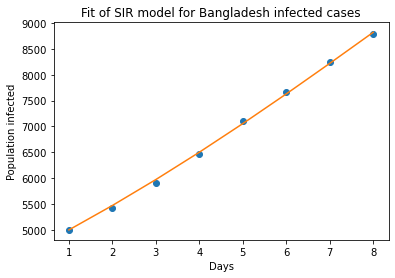

Optimal parameters: beta = -8.877498996937808  and gamma =  -8.968854607639669


In [42]:
population = float(163000000)
country_df3 = pd.DataFrame()
country_df3['Confirmed'] = tc_phase3['Confirmed'].fillna(0)
country_df3 = country_df3[10:]
country_df3['day_count'] = list(range(1,len(country_df3)+1))

y1data = [i for i in country_df3['Confirmed']]
x1data = country_df3.day_count
y1data = np.array(ydata, dtype=float)
x1data = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = tc_phase3['Recovered'].max()+tc_phase3['Deaths'].max()

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]


popt, pcov = optimize.curve_fit(fit_odeint, x1data, y1data)
fitted = fit_odeint(xdata, *popt)

plt.plot(x1data, y1data, 'o')
plt.plot(x1data, fitted)
plt.title("Fit of SIR model for Bangladesh infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

#### Where 𝛽 is the contagion rate of the pathogen and 𝛾 is the recovery rate.

In [44]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tc_test3['Date'], y=tc_test3['Confirmed'],
                    mode='lines+markers',marker_color='blue'))
fig.update_layout(title_text = 'Testing Rate')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [45]:
total_tested = tc_test3['Confirmed'].max()
total_positive = tc_test3['Active'].max()

positivecase_ratio = total_positive * 100 / total_tested
pcr = float("{:.2f}".format(positivecase_ratio))
test_million = np.round(1000000*tc_test3['Confirmed'].max()/163000000,2)
print('Total Number of people tested :', total_tested)
print('Total Number of positive cases :',total_positive)
print('Test Conducted per Million People :',test_million)
print('Positive case per Tests [%]:',pcr)
#Overall 
fig = go.Figure(data=[go.Pie(labels=['Total Samples Tested','Positive Cases from tested samples'],
                            values= [total_tested,total_positive],hole =.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value',textfont_size=20,
                  marker=dict(colors=['#263fa3','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig.update_layout(title_text='COVID19 Test Results from ICDR in Bangladesh',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

Total Number of people tested : 20995
Total Number of positive cases : 16564
Test Conducted per Million People : 128.8
Positive case per Tests [%]: 78.89


In [46]:
temp = tc_phase3.copy()
temp['Mortality Rate'] = temp['Deaths']/temp['Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality Rate'],mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Trend of Mortality Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()
print("Mean Mortality Rate",temp['Mortality Rate'].mean())

Mean Mortality Rate 1.5872788691134698


In [48]:
temp = tc_phase3.copy()
temp['Recovery Rate'] = temp['Recovered']/temp['Confirmed']*100
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery Rate'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Trend of Recovery Rate of Bangladesh')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()
print("Mean Recovery Rate",temp['Recovery Rate'].mean())

Mean Recovery Rate 16.28349947448779


### Observation Lockdown 3
There were over 21k on 16th May out which 4k+ have recoverd and 314 were deaths.

Mean Growth Rate 1.063324660974372

Optimal parameters: beta = -8.877498996937808  and gamma =  -8.968854607639669

Total 21k+ testing was done till 16th May.


Total Number of people tested : 20995
Total Number of positive cases : 16564
Test Conducted per Million People : 128.8
Positive case per Tests [%]: 78.89

Mean Mortality Rate[%] 1.5872788691134698

Mean Recovery Rate[%] 16.28349947448779